# LOAD PYTHON PACKAGES

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install indic-nlp-library

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [ ]:
!pip install punjabi_stopwords

In [ ]:
!pip install LiHiSTO

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for LiHiSTO: filename=LiHiSTO-0.0.2-py3-none-any.whl size=6623 sha256=c24e6bd25c70a6f8e4b70c98114bb25eb44740f95648d42376e6194c6cdb9bd0
  Stored in directory: /root/.cache/pip/wheels/30/4b/ee/9455c8f022cf1934fe774cbfd84b699cacca35d6fce0b7f60e
Successfully built LiHiSTO


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 7.1 MB/s eta 0:00:00


In [ ]:
!pip install wordcloud

In [ ]:
!pip install punjabi_stopwords

In [ ]:
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import math
import numpy as np
import collections
from numpy import linalg as la
import json
from indicnlp.tokenize import indic_tokenize
from punjabi_stopwords import remove_stopwords
from stopwords_hindi import hindi_sw
import emoji
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# LOAD DATA INTO MEMORY

In [ ]:
tweets_file_name = 'farmers-protest-tweets.json'

tweets_set = []
with open(tweets_file_name, 'r') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets_set.append(tweet)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")

print(f"Successfully loaded {len(tweets_set)} tweets.")

Successfully loaded 117407 tweets.


In [ ]:
language_count = {}

for tweet in tweets_set:
    lang = tweet.get('lang', 'unknown')  # Obtaining the language "unkown" in case it does not exist
    if lang in language_count:
        language_count[lang] += 1  # Increment de language count in case it is already in the dictionary
    else:
        language_count[lang] = 1  # Initialize the key in the dictionary
sorted_language_count = sorted(language_count.items(), key=lambda item: item[1], reverse=True)

for lang, count in sorted_language_count:
    print(f"{lang}: {count} tweets")


en: 48429 tweets
und: 35372 tweets
hi: 17880 tweets
pa: 10028 tweets
in: 1823 tweets
tl: 527 tweets
et: 524 tweets
ta: 451 tweets
kn: 265 tweets
ht: 222 tweets
mr: 187 tweets
es: 176 tweets
ur: 131 tweets
gu: 126 tweets
ml: 110 tweets
te: 103 tweets
fr: 92 tweets
tr: 86 tweets
it: 73 tweets
bn: 73 tweets
pt: 69 tweets
da: 64 tweets
hu: 60 tweets
de: 58 tweets
fi: 54 tweets
ne: 50 tweets
nl: 44 tweets
sl: 39 tweets
ca: 35 tweets
ro: 32 tweets
sv: 31 tweets
eu: 30 tweets
lv: 30 tweets
cy: 25 tweets
no: 22 tweets
cs: 21 tweets
or: 18 tweets
lt: 14 tweets
pl: 11 tweets
is: 7 tweets
vi: 5 tweets
ja: 4 tweets
ru: 3 tweets
ar: 1 tweets
fa: 1 tweets
si: 1 tweets


# PART 1

## PREPROCESS THE DOCUMENT

Removing stop words
● Tokenization
● Removing punctuation marks
● Stemming
● and... anything else you think it's needed (bonus point)

In [ ]:
def remove_emojis(text):
    return emoji.replace_emoji(text, "")


In [ ]:
def combine_hashtags(tokens):
    combined_tokens = []
    i = 0

    while i < len(tokens):
        if tokens[i].startswith('#') and i + 1 < len(tokens):
            # Combines de # with the next token
            combined_tokens.append(f"{tokens[i]}{tokens[i + 1]}")
            i += 2
        else:
            combined_tokens.append(tokens[i])
            i += 1

    return combined_tokens

In [ ]:
def combine_at(tokens):  #The same code as before but with the @ of the users
  combined_at = []
  i=0

  while i < len(tokens):
    if tokens[i].startswith('@') and i + 1 < len(tokens):
      combined_at.append(f"{tokens[i]}{tokens[i+1]}")
      i += 2
    else:
      combined_at.append(tokens[i])
      i += 1

  return combined_at

In [ ]:
def remove_punctuation_mixed(tokens):
    punctuation_list = [',','-','.','|','!','?','!!',':','...','=','/', ';', '(', ')', "'", "।"]
    punct_pattern = r"^[{}]+|[{}]+$".format(re.escape(''.join(punctuation_list)), re.escape(''.join(punctuation_list)))
    cleaned_tokens = []

    for token in tokens:
        # Remove punctuation using regex
        cleaned_token = re.sub(punct_pattern, '', token)
        # Add the cleaned token
        cleaned_tokens.append(cleaned_token)

    return cleaned_tokens

In [ ]:
stop_words_english = set(stopwords.words('english'))
stop_words_indonesian = set(stopwords.words('indonesian'))
stop_words_hindi = hindi_sw.get_hindi_sw()

from punjabi_stopwords import remove_stopwords  # Import your stopwords removal function

def build_terms(tweet):
    """
    Preprocess the tweet text (removing stop words, stemming,
    transforming to lowercase and returning the tokens).

    Arguments:
    tweet -- dictionary containing 'content' (text) and 'lang' (language)

    Returns:
    tokens - a list of tokens corresponding to the input text after preprocessing
    """

    line = tweet['content']
    lang = tweet['lang']

    stemmer = PorterStemmer()

    # Transform to lowercase
    line = line.lower()
    line = remove_emojis(line) #additionally we decided to also remove emojis from the text, since they are not relevant for the search
    line = re.sub(r"'", '', line)

    line = re.sub(r'https://[^\s]+', '', line)

    # Tokenize based on the language
    if lang in ['pa', 'hi']:  # Hindi and Punjabi
        tokens = indic_tokenize.trivial_tokenize(line)  # Tokenize for Punjabi
        tokens = combine_hashtags(tokens)
        tokens = combine_at(tokens)
    else:  # English and Indonesian
        tokens = line.split()

    tokens = remove_punctuation_mixed(tokens)


    # Remove stopwords based on language
    if lang == 'en':
        tokens = [x for x in tokens if x not in stop_words_english]
    elif lang == 'id':
        tokens = [x for x in tokens if x not in stop_words_indonesian]
    elif lang == 'hi':
        tokens = [x for x in tokens if x not in stop_words_hindi]
    elif lang == 'pa':
        # Join tokens into a single string for stopword removal
        text_string = ' '.join(tokens)
        filtered_text = remove_stopwords(text_string)  # Remove stopwords
        tokens = filtered_text.split()

    tokens = [x for x in tokens if x not in [',','-','.','|','!','?','!!',':','...','=','/', ';', '(', ')', "'", "।", '\n', '', '_', '"','&amp', '\n\n']] #extra layer of purification upon inspecting the most frequent tokens
    # Perform stemming
    tokens = [stemmer.stem(x) for x in tokens]

    return tokens


### PUNJABI EXAMPLE

In [ ]:
tweets_set[2]

{'url': 'https://twitter.com/parmarmaninder/status/1364506195453767680',
 'date': '2021-02-24T09:23:22+00:00',
 'content': "ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇਰੇ ਹਿਸਾਬ ਨਾਲ ਬਾਹਰ(ਪ੍ਰਦੇਸ਼) ਜਾਣ ਨਾਲੋਂ ਬਿਹਤਰ ਆ ਭਾਰਤ 'ਚ ਪੈਟਰੋਲ ਪੰਪ ਪਾ ਲਈਏ। 🤫🤫🤔🤔\n#FarmersProtest",
 'renderedContent': "ਪੈਟਰੋਲ ਦੀਆਂ ਕੀਮਤਾਂ ਨੂੰ ਮੱਦੇਨਜ਼ਰ ਰੱਖਦੇ ਹੋਏ \nਮੇਰੇ ਹਿਸਾਬ ਨਾਲ ਬਾਹਰ(ਪ੍ਰਦੇਸ਼) ਜਾਣ ਨਾਲੋਂ ਬਿਹਤਰ ਆ ਭਾਰਤ 'ਚ ਪੈਟਰੋਲ ਪੰਪ ਪਾ ਲਈਏ। 🤫🤫🤔🤔\n#FarmersProtest",
 'id': 1364506195453767680,
 'user': {'username': 'parmarmaninder',
  'displayname': 'maninder singh',
  'id': 476006247,
  'description': '।।ਨਾਨਕ ਨਾਮ ਚੜ੍ਹਦੀ ਕਲਾ ਤੇਰੈ ਭਾਣੈ ਸਰਬੱਤ ਦਾ ਭਲਾ।।',
  'rawDescription': '।।ਨਾਨਕ ਨਾਮ ਚੜ੍ਹਦੀ ਕਲਾ ਤੇਰੈ ਭਾਣੈ ਸਰਬੱਤ ਦਾ ਭਲਾ।।',
  'descriptionUrls': [],
  'verified': False,
  'created': '2012-01-27T17:30:27+00:00',
  'followersCount': 72,
  'friendsCount': 151,
  'statusesCount': 2285,
  'favouritesCount': 846,
  'listedCount': 0,
  'mediaCount': 265,
  'location': '',
  'protected': False,
  'linkUrl': None,
  'linkTcourl': None,
  'p

In [ ]:
build_terms(tweets_set[2])

['ਪੈਟਰੋਲ',
 'ਕੀਮਤਾਂ',
 'ਮੱਦੇਨਜ਼ਰ',
 'ਰੱਖਦੇ',
 'ਮੇਰੇ',
 'ਹਿਸਾਬ',
 'ਬਾਹਰ',
 'ਪ੍ਰਦੇਸ਼',
 'ਜਾਣ',
 'ਨਾਲੋਂ',
 'ਬਿਹਤਰ',
 'ਭਾਰਤ',
 'ਚ',
 'ਪੈਟਰੋਲ',
 'ਪੰਪ',
 'ਪਾ',
 'ਲਈਏ',
 '#farmersprotest']

### ENGLISH EXAMPLE

In [ ]:
tweets_set[0]

{'url': 'https://twitter.com/ArjunSinghPanam/status/1364506249291784198',
 'date': '2021-02-24T09:23:35+00:00',
 'content': 'The world progresses while the Indian police and Govt are still trying to take India back to the horrific past through its tyranny. \n\n@narendramodi @DelhiPolice Shame on you. \n\n#ModiDontSellFarmers \n#FarmersProtest \n#FreeNodeepKaur https://t.co/es3kn0IQAF',
 'renderedContent': 'The world progresses while the Indian police and Govt are still trying to take India back to the horrific past through its tyranny. \n\n@narendramodi @DelhiPolice Shame on you. \n\n#ModiDontSellFarmers \n#FarmersProtest \n#FreeNodeepKaur twitter.com/ravisinghka/st…',
 'id': 1364506249291784198,
 'user': {'username': 'ArjunSinghPanam',
  'displayname': 'Arjun Singh Panam',
  'id': 45091142,
  'description': 'Global Citizen, Actor, Director: Sky is the roof above my head, the world is the road I travel, love is my food & mother earth is my bed. Roy in @CosmosMovie',
  'rawDescription':

In [ ]:
build_terms(tweets_set[0])

['world',
 'progress',
 'indian',
 'polic',
 'govt',
 'still',
 'tri',
 'take',
 'india',
 'back',
 'horrif',
 'past',
 'tyranni',
 '@narendramodi',
 '@delhipolic',
 'shame',
 '#modidontsellfarm',
 '#farmersprotest',
 '#freenodeepkaur']

### INDONESIAN EXAMPLE

In [ ]:
count=0
i=0
for tweet in tweets_set:
    if tweet['lang'] == 'in':
        count = i
        break
    i += 1
print(count)


139


In [ ]:
tweets_set[139]

{'url': 'https://twitter.com/SandeepLakha11/status/1364499171831549953',
 'date': '2021-02-24T08:55:28+00:00',
 'content': '@GoluBha42573817 @pinkichaubey Toh salayeo ehnke liye hi kuch krlo agar yeh b sadko pr aa gye fir tum log modi bhagti hi kroge  . Andh bhgto  #FarmersProtest',
 'renderedContent': '@GoluBha42573817 @pinkichaubey Toh salayeo ehnke liye hi kuch krlo agar yeh b sadko pr aa gye fir tum log modi bhagti hi kroge  . Andh bhgto  #FarmersProtest',
 'id': 1364499171831549953,
 'user': {'username': 'SandeepLakha11',
  'displayname': 'Sandeep Lakha',
  'id': 1334192494255374336,
  'description': '',
  'rawDescription': '',
  'descriptionUrls': [],
  'verified': False,
  'created': '2020-12-02T17:48:21+00:00',
  'followersCount': 38,
  'friendsCount': 115,
  'statusesCount': 263,
  'favouritesCount': 619,
  'listedCount': 0,
  'mediaCount': 16,
  'location': '',
  'protected': False,
  'linkUrl': None,
  'linkTcourl': None,
  'profileImageUrl': 'https://pbs.twimg.com/profile_i

In [ ]:
build_terms(tweets_set[139])

['@golubha42573817',
 '@pinkichaubey',
 'toh',
 'salayeo',
 'ehnk',
 'liy',
 'hi',
 'kuch',
 'krlo',
 'agar',
 'yeh',
 'b',
 'sadko',
 'pr',
 'aa',
 'gye',
 'fir',
 'tum',
 'log',
 'modi',
 'bhagti',
 'hi',
 'kroge',
 'andh',
 'bhgto',
 '#farmersprotest']

### HINDI EXAMPLE

In [ ]:
tweets_set[21]

{'url': 'https://twitter.com/rajraka/status/1364505444606119940',
 'date': '2021-02-24T09:20:23+00:00',
 'content': 'आज कल लोग मेरी पोस्ट को ऐसे इग्नोर कर रहे है जैसे पेट्रोल के दाम मैने ही बढ़ाया है...🙄🙄\n#FarmersProtest',
 'renderedContent': 'आज कल लोग मेरी पोस्ट को ऐसे इग्नोर कर रहे है जैसे पेट्रोल के दाम मैने ही बढ़ाया है...🙄🙄\n#FarmersProtest',
 'id': 1364505444606119940,
 'user': {'username': 'rajraka',
  'displayname': 'Raj',
  'id': 116396264,
  'description': 'Dance // Travel lover.',
  'rawDescription': 'Dance // Travel lover.',
  'descriptionUrls': [],
  'verified': False,
  'created': '2010-02-22T08:55:45+00:00',
  'followersCount': 285,
  'friendsCount': 1608,
  'statusesCount': 3014,
  'favouritesCount': 7365,
  'listedCount': 1,
  'mediaCount': 129,
  'location': 'जींद हरियाणा',
  'protected': False,
  'linkUrl': None,
  'linkTcourl': None,
  'profileImageUrl': 'https://pbs.twimg.com/profile_images/1150677137067655168/xUylBqQ0_normal.jpg',
  'profileBannerUrl': 'https://

In [ ]:
build_terms(tweets_set[21])

['लोग',
 'मेरी',
 'पोस्ट',
 'इग्नोर',
 'पेट्रोल',
 'दाम',
 'मैने',
 'बढ़ाया',
 '#farmersprotest']

## Tweets Processing:

In [ ]:
def find_pattern(tweet, pattern):
    hashtags = []
    for token in tweet:
        if re.match(pattern, token):
            hashtags.append(token)
    return hashtags

In [ ]:
mapping_doc_path = 'tweet_document_ids_map.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(mapping_doc_path)

id_to_number = dict(zip(df['id'], df['docId']))

### OPTION ONE: CREATING A LIST

In [ ]:
def process_tweets_option1(set):
    lastid = len(id_to_number.keys())
    processed = []
    for i in range(len(set)):
        if set[i]['id'] in id_to_number.keys():
            doc_num = id_to_number[set[i]['id']]
        else:
            lastid += 1
            newid= f'doc_{lastid}'
            while newid in id_to_number.keys():#security measure for if there is a skipped number
                lastid += 1
                newid= f'doc_{lastid}'
            doc_num = newid
        processed_text = list(build_terms(set[i]))
        wo_processing = set[i]['content']
        date = set[i]['date']
        hashtags = find_pattern(processed_text, r'^#')
        likes = set[i]['likeCount']
        num_retweet = set[i]['retweetCount']
        tweet_url = set[i]['url']
        tweet_user = set[i]['user']['username']

        tweet_dict = {'docNum': doc_num, 'id': set[i]['id'], 'tweet': wo_processing, 'date': date, 'hashtags': hashtags, 'likes': likes, 'retweets': num_retweet,'url': tweet_url, 'tokenizedContent': processed_text, 'userName':tweet_user}
        processed.append(tweet_dict)

    return processed

In [ ]:
processed_tweets1 = process_tweets_option1(tweets_set)

In [ ]:
num_processed_tweets = len(processed_tweets1)
print(num_processed_tweets)

117407


### OPTION 2: CREATING A DICTIONARY OF DICTIONARIES

In [ ]:
def process_tweets_option2(set):
    lastid = len(id_to_number.keys())
    processed = {}  # Initialize an empty dictionary
    for i in range(len(set)):
        if set[i]['id'] in id_to_number.keys():
            doc_num = id_to_number[set[i]['id']]
        else:
            continue

        #else:
          #  lastid += 1
          #  newid = f'doc_{lastid}'
          #  while newid in id_to_number.keys():
          #      lastid += 1
          #      newid = f'doc_{lastid}'
          #  doc_num = newid

        processed_text = list(build_terms(set[i]))
        wo_processing = set[i]['content']
        date = set[i]['date']
        hashtags = find_pattern(processed_text, r'^#')
        likes = set[i]['likeCount']
        num_retweet = set[i]['retweetCount']
        tweet_url = set[i]['url']
        tweet_user = set[i]['user']['username']

        tweet_dict = {
            'docNum': doc_num,
            'id': set[i]['id'],
            'tweet': wo_processing,
            'date': date,
            'hashtags': hashtags,
            'likes': likes,
            'retweets': num_retweet,
            'url': tweet_url,
            'tokenizedContent': processed_text,
            'userName': tweet_user
        }

        processed[doc_num] = tweet_dict

    return processed

In [ ]:
processed_tweets2 = process_tweets_option2(tweets_set)


In [ ]:
print(len(processed_tweets2))

48429


## **Exploratory data analysis**

In [ ]:
all_tokens = []
for tweet in processed_tweets1:
    all_tokens.extend(tweet['tokenizedContent'])

In [ ]:
token_counts = {}
for token in all_tokens:
    if token in token_counts.keys():
        token_counts[token] += 1
    else: token_counts[token] = 1

In [ ]:
sorted_tokens = dict(sorted(token_counts.items(), key=lambda item:item[1], reverse=True))
print(sorted_tokens)

{'#farmersprotest': 120581, 'farmer': 16740, 'support': 6694, 'india': 6542, 'किसान': 6408, '#releasedetainedfarm': 5961, '#farmersmakeindia': 5267, 'protest': 4913, '#mahapanchayatrevolut': 4783, '#repealonlywayahead': 4565, '#indiabeingsilenc': 4438, '#standwithfarm': 3675, 'right': 3611, 'peopl': 3473, '#farmer': 3374, 'modi': 3282, '#railrokoforfarm': 3122, '#disharavi': 3117, 'indian': 2971, '#istandwithfarm': 2900, '#freenodeepkaur': 2813, '#msplawforallcrop': 2805, '#modiignoringfarmersdeath': 2790, 'bjp': 2786, '#pagdi_sambhal_jatta': 2768, 'govern': 2749, 'ਦੀ': 2712, 'law': 2583, '#dpstopintimidatingfarm': 2570, 'jai': 2509, 'किसानों': 2458, 'govt': 2359, '#kisanandolan': 2305, 'stand': 2248, '@narendramodi': 2236, '#farmersprostest': 2194, 'आंदोलन': 2176, 'thank': 2142, 'pleas': 2093, '#freedisharavi': 2064, '#gobackmodi': 2034, 'hai': 2022, 'farm': 2007, 'ਕਿਸਾਨ': 2001, 'like': 1978, 'world': 1945, 'need': 1934, 'one': 1877, 'us': 1835, 'arrest': 1833, 'delhi': 1829, '@kisane

In [ ]:
filtered_tokens = {}

for token in sorted_tokens.keys():
    if token.startswith('@') or token.startswith('#'):
        continue
    if not token.isascii():
        continue
    filtered_tokens[token]=sorted_tokens[token]


(-0.5, 799.5, 399.5, -0.5)

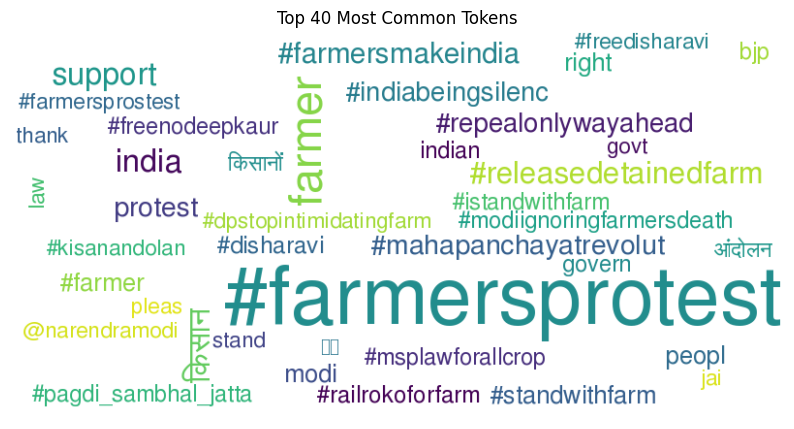

In [ ]:
font = "gargi.ttf"

wordcloud = WordCloud(
    width=800,         # width of the word cloud
    height=400,        # height of the word cloud
    background_color='white',  # background color
    colormap='viridis',         # color scheme for the words
    font_path= font,
    max_words=100)
wordcloud.generate_from_frequencies(dict(list(sorted_tokens.items())[:40]))

plt.figure(figsize=(10,6))
plt.title(f"Top 40 Most Common Tokens")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.axis('off')

(-0.5, 799.5, 399.5, -0.5)

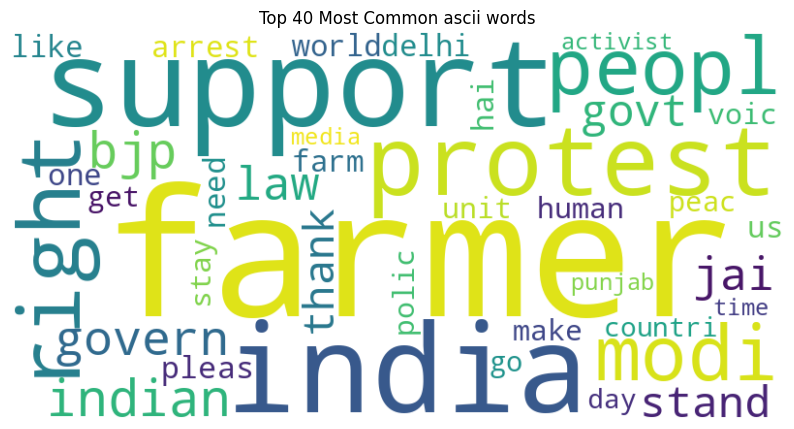

In [ ]:
wordcloud = WordCloud(
    width=800,         # width of the word cloud
    height=400,        # height of the word cloud
    background_color='white',  # background color
    colormap='viridis',         # color scheme for the words
    max_words=100)
wordcloud.generate_from_frequencies(dict(list(filtered_tokens.items())[:40]))

plt.figure(figsize=(10,6))
plt.title(f"Top 40 Most Common ascii words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.axis('off')

In [ ]:
retweetsList = []
likesList = []

for tweet in processed_tweets1:
    retweetsList.append(tweet['retweets'])
    likesList.append(tweet['likes'])

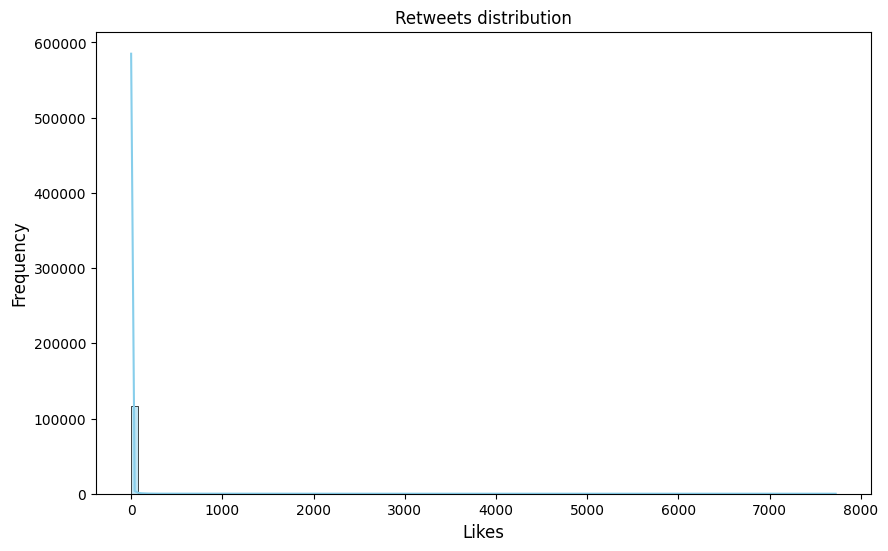

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(retweetsList, bins=100, kde=True, color="skyblue")
plt.title(f"Retweets distribution")
plt.xlabel("Likes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

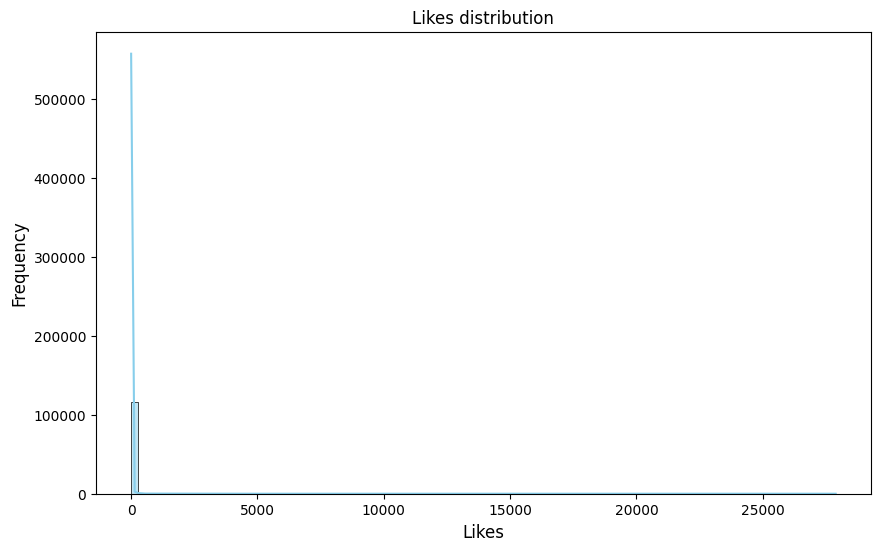

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(likesList, bins=100, kde=True, color="skyblue")
plt.title(f"Likes distribution")
plt.xlabel("Likes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [ ]:
sorted_tweets_by_likes = sorted(processed_tweets1, key=lambda item:item['likes'], reverse=True)
print('The most liked tweets are the following:')
for i in range(5):
    print('-------> Top', i + 1, 'tweet with ', sorted_tweets_by_likes[i]['likes'],' likes:')
    print(sorted_tweets_by_likes[i]['tweet'])
    print('-------> from user: ', sorted_tweets_by_likes[i]['userName'],'\n')

The most liked tweets are the following:
-------> Top 1 tweet with  27888  likes:
There's a #FarmersProtest happening in Germany.

But the German Govt didn’t block their path with barbed wires, dig highways or label them Anti-National. And neither did the Govt declare it an ‘internal matter’ where others can’t comment. I guess that’s how democracies work. https://t.co/pZtigTgWT8
-------> from user:  dhruv_rathee 

-------> Top 2 tweet with  25824  likes:
मध्यप्रदेश में निजी व्यापारी 200 करोड़ का धान खरीदकर भाग गया। किसान पैसे के लिए धरना दे रहे है।
अब भी बताना पड़ेगा काला क्या है
#FarmLaws #FarmersProtest #किसान_एकता_जिंदाबाद
-------> from user:  RakeshTikaitBKU 

-------> Top 3 tweet with  19284  likes:
लहरों को ख़ामोश देख कर ये ना समझना कि समंदर में रवानी नहीं , हम जब भी उठेंगे तूफ़ान बन कर उठेंगे , बस उठने की अभी ठानी नहीं ... #FarmersProtest                                        #JittegaKisaan
-------> from user:  sherryontopp 

-------> Top 4 tweet with  19198  likes:
हाँ मैं जान

In [ ]:
likesList.sort(reverse=False)
likesList= np.array(likesList)

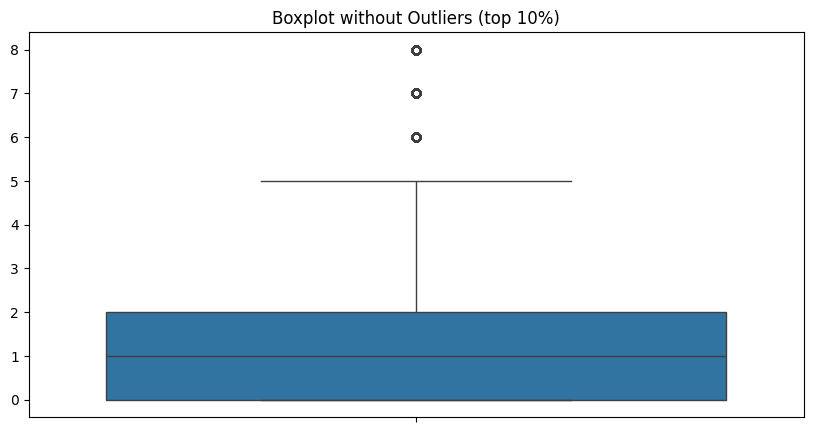

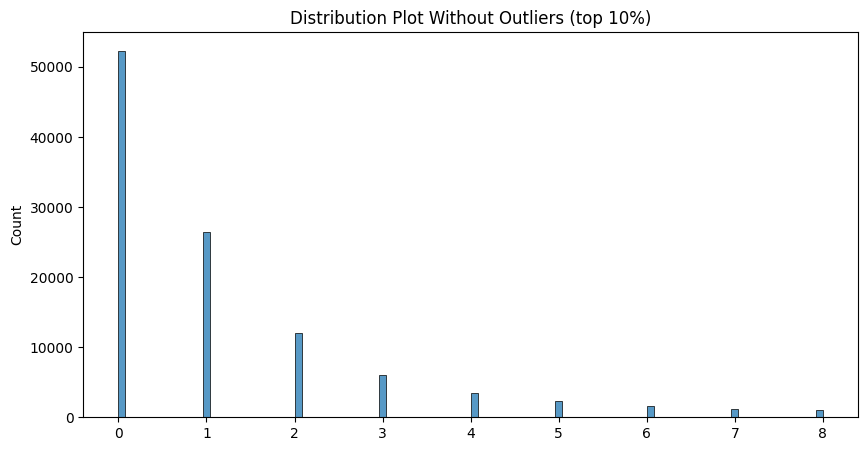

Cleaned Data (Without Outliers): [0 0 0 ... 8 8 8]


In [ ]:
upper_bound = np.percentile(likesList, 90)
cleaned_data = likesList[(likesList <= upper_bound)]
plt.figure(figsize=(10, 5))
sns.boxplot(data=cleaned_data)
plt.title("Boxplot without Outliers (top 10%)")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data, bins=100)
plt.title("Distribution Plot Without Outliers (top 10%)")
plt.show()

# Optional: Print cleaned data for confirmation
print("Cleaned Data (Without Outliers):", cleaned_data)

In [ ]:
no0likes = likesList[likesList > 100]

In [ ]:
print('Out of the ', len(likesList), ' ther are ', len(no0likes), ' tweets with more than 100 likes')

Out of the  117407  ther are  2119  tweets with more than 100 likes


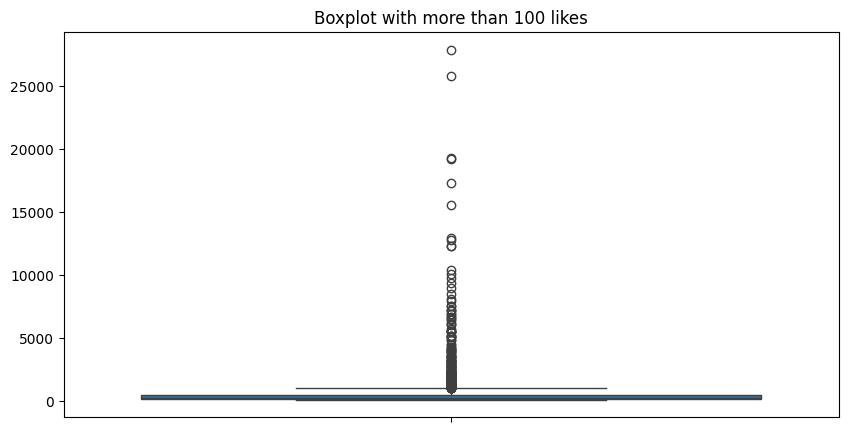

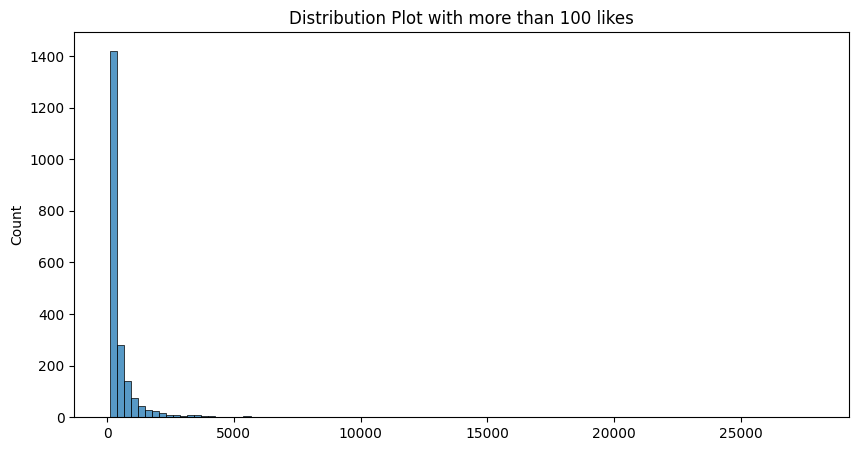

Cleaned Data (Without 0s): [  101   101   101 ... 19284 25824 27888]


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=no0likes)
plt.title("Boxplot with more than 100 likes")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(no0likes, bins=100)
plt.title("Distribution Plot with more than 100 likes")
plt.show()

# Optional: Print cleaned data for confirmation
print("Cleaned Data (Without 0s):", no0likes)

We will now do the same but for the number of retweets:

In [ ]:
sorted_tweets_by_retweets = sorted(processed_tweets1, key=lambda item:item['retweets'], reverse=True)
print('The most liked tweets are the following:')
for i in range(5):
    print('-------> Top', i + 1, 'tweet with ', sorted_tweets_by_retweets[i]['retweets'],' retweets:')
    print(sorted_tweets_by_retweets[i]['tweet'])
    print('-------> from user: ', sorted_tweets_by_retweets[i]['userName'],'\n')

The most liked tweets are the following:
-------> Top 1 tweet with  7723  retweets:
मध्यप्रदेश में निजी व्यापारी 200 करोड़ का धान खरीदकर भाग गया। किसान पैसे के लिए धरना दे रहे है।
अब भी बताना पड़ेगा काला क्या है
#FarmLaws #FarmersProtest #किसान_एकता_जिंदाबाद
-------> from user:  RakeshTikaitBKU 

-------> Top 2 tweet with  6164  retweets:
There's a #FarmersProtest happening in Germany.

But the German Govt didn’t block their path with barbed wires, dig highways or label them Anti-National. And neither did the Govt declare it an ‘internal matter’ where others can’t comment. I guess that’s how democracies work. https://t.co/pZtigTgWT8
-------> from user:  dhruv_rathee 

-------> Top 3 tweet with  4673  retweets:
disha ravi, a 21-year-old climate activist, has been arrested by delhi police for sharing a toolkit @GretaThunberg  posted in support of the #farmersprotest. 

disha’s arrest is alarming and the world needs to pay attention. #freedisharavi

https://t.co/IYGsLpNjwZ
-------> from u

In [ ]:
for i in range(10):
    print('-> Top', i + 1, 'tweet with most retweet, id:', sorted_tweets_by_retweets[i]['docNum'])
    print('-> Top', i + 1, 'tweet with most likes, id:  ', sorted_tweets_by_likes[i]['docNum'])
    print('\n')


-> Top 1 tweet with most retweet, id: doc_113632
-> Top 1 tweet with most likes, id:   doc_3203


-> Top 2 tweet with most retweet, id: doc_3203
-> Top 2 tweet with most likes, id:   doc_113632


-> Top 3 tweet with most retweet, id: doc_38410
-> Top 3 tweet with most likes, id:   doc_83874


-> Top 4 tweet with most retweet, id: doc_38012
-> Top 4 tweet with most likes, id:   doc_65353


-> Top 5 tweet with most retweet, id: doc_46206
-> Top 5 tweet with most likes, id:   doc_46206


-> Top 6 tweet with most retweet, id: doc_27071
-> Top 6 tweet with most likes, id:   doc_62412


-> Top 7 tweet with most retweet, id: doc_45142
-> Top 7 tweet with most likes, id:   doc_45142


-> Top 8 tweet with most retweet, id: doc_83874
-> Top 8 tweet with most likes, id:   doc_96125


-> Top 9 tweet with most retweet, id: doc_65353
-> Top 9 tweet with most likes, id:   doc_88771


-> Top 10 tweet with most retweet, id: doc_62412
-> Top 10 tweet with most likes, id:   doc_38262




In [ ]:
retweetsList.sort(reverse=False)
retweetsList= np.array(retweetsList)

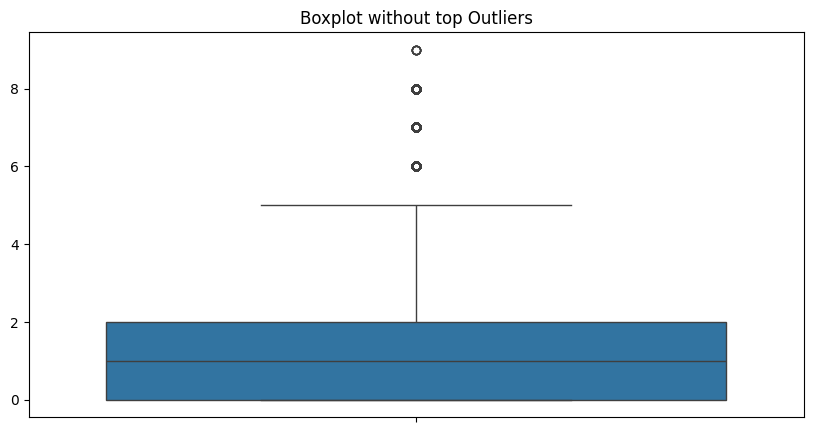

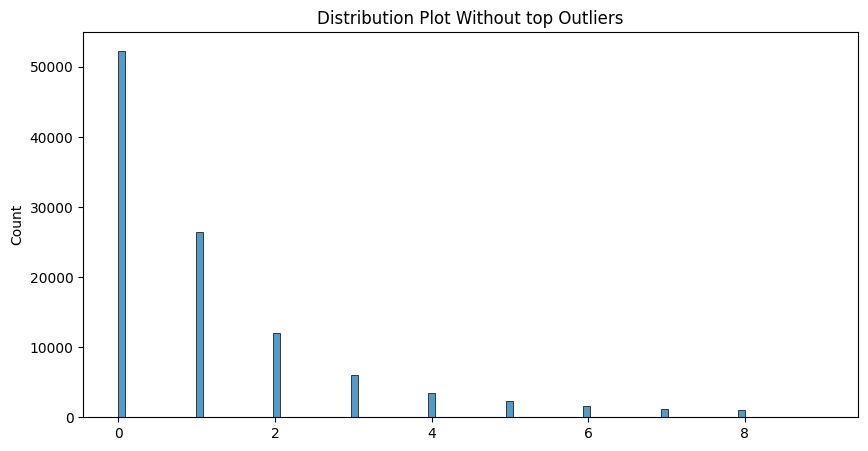

Cleaned Data (Without top Outliers): [0 0 0 ... 9 9 9]


In [ ]:
upper_bound = np.percentile(retweetsList, 90)
cleaned_data = likesList[(retweetsList <= upper_bound)]
plt.figure(figsize=(10, 5))
sns.boxplot(data=cleaned_data)
plt.title("Boxplot without top Outliers")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data, bins=100)
plt.title("Distribution Plot Without top Outliers")
plt.show()

print("Cleaned Data (Without top Outliers):", cleaned_data)

In [ ]:
no0retweets = retweetsList[retweetsList > 100]

In [ ]:
no0retweets

array([ 101,  101,  101, ..., 4673, 6164, 7723])

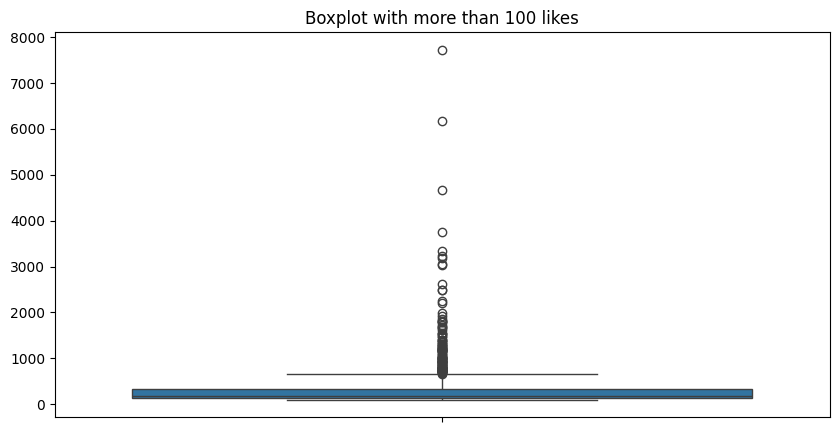

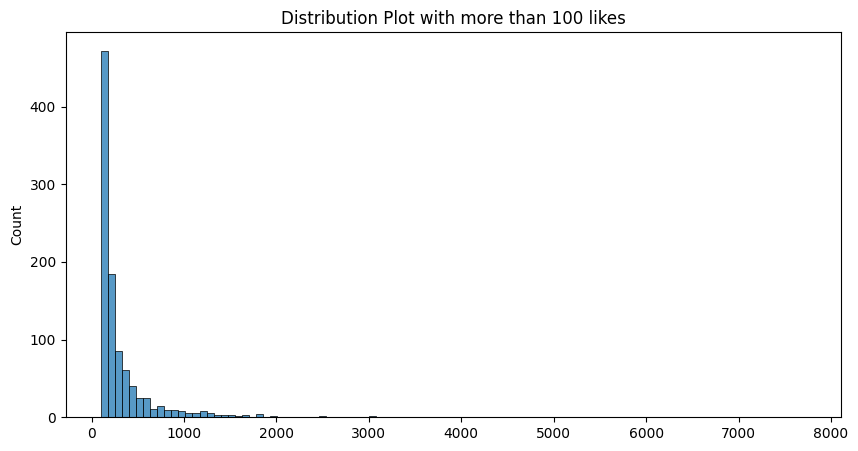

Cleaned Data (with more than 100 likes): [ 101  101  101 ... 4673 6164 7723]


In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=no0retweets)
plt.title("Boxplot with more than 100 likes")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(no0retweets, bins=100)
plt.title("Distribution Plot with more than 100 likes")
plt.show()

print("Cleaned Data (with more than 100 likes):", no0retweets)

# PART 2

## **Inverted Index**

In [ ]:
def build_inverted_index(processed_tweets):
    inverted_index = defaultdict(list)

    for doc_num, tweet_data in processed_tweets.items():
        tokens = tweet_data['tokenizedContent']

        for token in tokens:
            if doc_num not in inverted_index[token]:
                inverted_index[token].append(doc_num)

    return inverted_index

In [ ]:
inverted_index = build_inverted_index(processed_tweets2)
print(len(inverted_index['farmer']))

12748


## **TF-IDF**

In [ ]:
from os import remove
stop_words_english_q = set(stopwords.words('english'))
def build_terms_query(query, lang='en'):
  line = query

  stemmer = PorterStemmer()

  # Transform to lowercase
  line = line.lower()
  line = remove_emojis(line) #additionally we decided to also remove emojis from the text, since they are not relevant for the search
  line = re.sub(r"'", '', line)


  line = re.sub(r'https://[^\s]+', '', line)

  # Tokenize based on the language
  if lang in ['pa', 'hi']:  # Hindi and Punjabi
      tokens = indic_tokenize.trivial_tokenize(line)  # Tokenize for Punjabi
      tokens = combine_hashtags(tokens)
      tokens = combine_at(tokens)
  else:  # English and Indonesian
      tokens = line.split()

  tokens = remove_punctuation_mixed(tokens)


  # Remove stopwords based on language
  if lang == 'en':
      tokens = [x for x in tokens if x not in stop_words_english]
  elif lang == 'id':
      tokens = [x for x in tokens if x not in stop_words_indonesian]
  elif lang == 'hi':
      tokens = [x for x in tokens if x not in stop_words_hindi]
  elif lang == 'pa':
      # Join tokens into a single string for stopword removal
      text_string = ' '.join(tokens)
      filtered_text = remove_stopwords(text_string)  # Remove stopwords
      tokens = filtered_text.split()

  tokens = [x for x in tokens if x not in [',','-','.','|','!','?','!!',':','...','=','/', ';', '(', ')', "'", "।", '\n', '', '_', '"','&amp', '\n\n']] #extra layer of purification upon inspecting the most frequent tokens
  # Perform stemming
  tokens = [stemmer.stem(x) for x in tokens]

  return tokens


In [ ]:
def inverted_index_tfidf(query_terms, inverted_index, total_tweets, processed_tweets2, gettfidfs=False):
  tweets_scores = defaultdict(float) #dictionary to store doc_id -> score
  doc_candidates = set(inverted_index[query_terms[0]])
  for item in query_terms[1:]:
    doc_candidates &= set(inverted_index[item])

  for term in query_terms: #for each word
    if term in inverted_index:
      df = len(inverted_index[term]) # we compute document frequency (DF) that is the number of documents containing the term
      idf = np.round(np.log(total_tweets/df), 4) #we compute IDF with the formula
      for doc_id in doc_candidates: #for each document that conatins the term
        term_frequency = processed_tweets2[doc_id]['tokenizedContent'].count(term)   #term frequency of the term in the document
        tf = np.round(term_frequency / len(processed_tweets2[doc_id]), 4) #we compute the tf term_frequency/words in that document
        # we compute tf-idf and add it to the tweet score
        tweets_scores[doc_id] += tf * idf

  #we order the tweet scores in descending order by score
  ranked_tweets = dict(sorted(tweets_scores.items(), key=lambda x: x[1], reverse=True))

  return ranked_tweets

In [ ]:
query = "people's rights"
query_terms = build_terms_query(query)
retrieved_docs = inverted_index_tfidf(query_terms, inverted_index, len(processed_tweets2), processed_tweets2) #documents were the query appears ranked by scores

top_10_results = list(retrieved_docs.items())[:10] #we take top 10
for tweet_id, score in top_10_results:
    print(tweet_id, score)



doc_8894 1.37875
doc_27922 1.10573
doc_14469 1.1018299999999999
doc_19343 0.82881
doc_18982 0.82881
doc_19327 0.82881
doc_19354 0.82881
doc_19299 0.82881
doc_19329 0.82881
doc_20509 0.82881


## Evaluation

### Ground Truth

In [ ]:
import pandas as pd

gt_df = pd.read_csv('evaluation_gt.csv', delimiter=";")
queries = {1: "people's right", 2: "Indian government"}
score_dfs = []  # List to store df for each query

# Process each query to calculate TF-IDF scores
for query_id, query_text in queries.items():
    # Tokenize the query and calculate TF-IDF scores
    query_terms = build_terms_query(query_text)
    tfidf_scores = inverted_index_tfidf(query_terms, inverted_index, len(processed_tweets2), processed_tweets2)

    # Convert tfidf_scores to a DataFrame and add the query_id
    query_df = pd.DataFrame(tfidf_scores.items(), columns=["docId", "score"])
    query_df["query_id"] = query_id
    score_dfs.append(query_df)

# Concatenate all query-specific DataFrames into one
all_scores_df = pd.concat(score_dfs, ignore_index=True)

# Merge the TF-IDF scores with the ground truth DataFrame
mydf = gt_df.merge(all_scores_df, on=["docId", "query_id"], how="left")

# Fill missing scores with 0
mydf["score"].fillna(0, inplace=True)

mydf.head(100)


<ipython-input-61-4acc94ae32c3>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mydf["score"].fillna(0, inplace=True)


,docId,query_id,label,score
0,doc_156,1.0,0.0,0.00000
1,doc_1039,1.0,0.0,0.00000
2,doc_1047,1.0,1.0,0.55189
3,doc_1685,1.0,0.0,0.00000
4,doc_2100,1.0,1.0,0.82686
...,...,...,...,...
56,doc_319,2.0,0.0,0.00000
57,doc_427,2.0,0.0,0.00000
58,doc_460,2.0,0.0,0.00000
59,doc_748,2.0,0.0,0.00000


### P@K

In [ ]:
def precision_at_k(doc_score, y_score, k):
    order = np.argsort(y_score)[::-1]
    #doc_score = np.take(doc_score, order[:k])
    doc_score = doc_score[order[:k]]
    relevant = sum(doc_score == 1)
    return float(relevant) / k

### R@K

In [ ]:
def recall_at_k(doc_score, y_score, k=10):
    doc_score = np.asarray(doc_score)
    y_score = np.asarray(y_score)
    order = np.argsort(-y_score)
    top_k = doc_score[order[:k]]

    relevant = np.sum(top_k == 1)
    total_relevant = np.sum(doc_score == 1)

    if total_relevant == 0:
        return 0.0

    return relevant / total_relevant

### AP@K

In [ ]:
def avg_precision_at_k(doc_score, y_score, k):
    order = np.argsort(y_score)[::-1]  # get the list of indexes of the predicted score sorted in descending order.
    prec_at_i = 0
    prec_at_i_list = []
    number_of_relevant = 0
    number_to_iterate = min(k, len(order))
    for i in range(number_to_iterate):
        if doc_score[order[i]] == 1:
            number_of_relevant += 1
            prec_at_i = number_of_relevant / (i + 1)
            prec_at_i_list.append(prec_at_i)
    if number_of_relevant == 0:
        return 0
    else:
      return np.sum(prec_at_i_list) / number_of_relevant

### F1-score@K

In [ ]:
def f1_at_k(doc_score, y_score, k=10):
    precision = precision_at_k(doc_score, y_score, k)
    recall = recall_at_k(doc_score, y_score, k)
    if precision + recall == 0: #avoid division by 0
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

### MAP

In [ ]:
def map_at_k(search_res, k=10):
    avp = []
    for q in search_res["query_id"].unique():  # loop over all query id
        curr_data = search_res[search_res["query_id"] == q]  # select data for current query
        avp.append(avg_precision_at_k(np.array(curr_data["label"]),
                   np.array(curr_data["score"]), k))  #append average precision for current query
    return np.sum(avp) / len(avp), avp  # return mean average precision

### MRR

In [ ]:
def rr_at_k(doc_score, y_score, k=10):

    order = np.argsort(y_score)[::-1]  # get the list of indexes of the predicted score sorted in descending order.
    doc_score = np.take(doc_score, order[:k])  # sort the actual relevance label of the documents based on predicted score(hint: np.take) and take first k.
    if np.sum(doc_score) == 0:  # if there are not relevant doument return 0
        return 0
    return 1 / (np.argmax(doc_score == 1) + 1)  # hint: to get the position of the first relevant document use "np.argmax"


In [ ]:
def mrr_at_k(search_results, k=10):
    """
    Computes Mean Reciprocal Rank (MRR) at k over multiple queries.

    Parameters
    ----------
    search_results: DataFrame containing columns 'query_id', 'is_relevant', and 'predicted_relevance'.
    k : int, optional (default=10)
        Number of top-ranked documents to consider for each query.

    Returns
    -------
    mrr : float
        Mean Reciprocal Rank (MRR) at k over all queries.
    """
    RRs = []

    # Loop over each unique query
    for q in search_results['query_id'].unique():
        # Get labels and scores for the current query
        labels = np.array(search_results[search_results['query_id'] == q]["label"])
        scores = np.array(search_results[search_results['query_id'] == q]["score"])

        # Calculate RR for the current query and append to RRs list
        RRs.append(rr_at_k(labels, scores, k))

    # Calculate MRR as the mean of all Reciprocal Ranks
    return np.round(float(sum(RRs) / len(RRs)), 4) if RRs else 0.0

### NDCG

In [ ]:
def dcg_at_k(doc_score, y_score, k=10):
    order = np.argsort(y_score)[::-1]  # get the list of indexes of the predicted score sorted in descending order.
    doc_score = np.take(doc_score, order[:k])  # sort the actual relevance label of the documents based on predicted score(hint: np.take) and take first k.
    gain = 2 ** doc_score - 1  # Compute gain (use formula 7 above)
    discounts = np.log2(np.arange(len(doc_score)) + 2)  # Compute denominator
    return np.sum(gain / discounts)  #return dcg@k


def ndcg_at_k(doc_score, y_score, k=10):
    dcg_max = dcg_at_k(doc_score, doc_score, k)
    if not dcg_max:
        return 0
    return np.round(dcg_at_k(doc_score, y_score, k) / dcg_max, 4)

## Evaluation of queries: ["people's rights", "Indian Government"]

In [ ]:
# Define the queries and assign unique labels automatically
queries = ["people's rights", "Indian Government"]
query_labels = [1, 2]

# Loop over each query with its assigned query_id
for query, query_id in zip(queries, query_labels):
    print(f"Results for query: {query}")

    # Filter `mydf` for this query using `query_id`
    query_df = mydf[mydf["query_id"] == query_id]

    # Compute precision, recall, F1, average precision, and NDCG for the current query
    k = 10  # Adjust `k` as required
    precision = precision_at_k(query_df['label'].values, query_df['score'].values, k=k)
    recall = recall_at_k(query_df['label'].values, query_df['score'].values, k=k)
    f1 = f1_at_k(query_df['label'].values, query_df['score'].values, k=k)
    avg_precision = avg_precision_at_k(query_df['label'].values, query_df['score'].values, k=k)
    ndcg = ndcg_at_k(query_df['label'].values, query_df['score'].values, k=k)

    # Calculate MAP and MRR for the current query if needed
    map_query = map_at_k(query_df, k=k)  # Alternatively, calculate across all queries outside the loop
    mrr_query = mrr_at_k(query_df, k=k)  # Same as above

    # Display individual metrics for the current query
    print(f"precision@{k} for '{query}': {precision}")
    print(f"recall@{k} for '{query}': {recall}")
    print(f"f1@{k} for '{query}': {f1}")
    print(f"avg_precision@{k} for '{query}': {avg_precision}")
    print(f"ndcg@{k} for '{query}': {ndcg}")
    print(f"map@{k} for '{query}': {map_query}")
    print(f"mrr@{k} for '{query}': {mrr_query}")
    print()

# Alternatively, calculate overall MAP and MRR across both queries
overall_map = map_at_k(mydf, k=k)
overall_mrr = mrr_at_k(mydf, k=k)

print(f"Overall map@{k}: {overall_map}")
print(f"Overall mrr@{k}: {overall_mrr}")


Results for query: people's rights
precision@10 for 'people's rights': 0.9
recall@10 for 'people's rights': 0.6666666666666666
f1@10 for 'people's rights': 0.7659574468085106
avg_precision@10 for 'people's rights': 0.9626543209876544
ndcg@10 for 'people's rights': 0.9266
map@10 for 'people's rights': (0.9626543209876544, [0.9626543209876544])
mrr@10 for 'people's rights': 1.0

Results for query: Indian Government
precision@10 for 'Indian Government': 1.0
recall@10 for 'Indian Government': 0.6666666666666666
f1@10 for 'Indian Government': 0.8
avg_precision@10 for 'Indian Government': 1.0
ndcg@10 for 'Indian Government': 1.0
map@10 for 'Indian Government': (1.0, [1.0])
mrr@10 for 'Indian Government': 1.0

Overall map@10: (0.6542181069958848, [0.9626543209876544, 1.0, 0])
Overall mrr@10: 0.6667


## Our 5 Queries

### Select queries

In [ ]:
my_queries = ["bjp govern","march to delhi","jai kisaan","punjab to delhi", "farmer's support"]

In [ ]:
for i, query in enumerate(my_queries, start=1):
    print(f"\nResults for Query {i}: '{query}'")
    query_terms = build_terms_query(query)
    retrieved_docs = inverted_index_tfidf(query_terms, inverted_index, len(processed_tweets2), processed_tweets2)

    top_10_results = list(retrieved_docs.items())[:10]

    print("Top 10 documents and scores:")
    for tweet_id, score in top_10_results:
        print(f"Document ID: {tweet_id}, Score: {score}")



Results for Query 1: 'bjp govern'
Top 10 documents and scores:
Document ID: doc_14219, Score: 2.21851
Document ID: doc_31836, Score: 1.24402
Document ID: doc_29486, Score: 1.24402
Document ID: doc_5959, Score: 0.94684
Document ID: doc_10766, Score: 0.94684
Document ID: doc_9441, Score: 0.94684
Document ID: doc_44921, Score: 0.94684
Document ID: doc_5957, Score: 0.94684
Document ID: doc_22469, Score: 0.94684
Document ID: doc_10526, Score: 0.94684

Results for Query 2: 'march to delhi'
Top 10 documents and scores:
Document ID: doc_8853, Score: 1.84088
Document ID: doc_3218, Score: 1.6098400000000002
Document ID: doc_3227, Score: 1.6098400000000002
Document ID: doc_3224, Score: 1.6098400000000002
Document ID: doc_3200, Score: 0.92044
Document ID: doc_44534, Score: 0.92044
Document ID: doc_20612, Score: 0.92044
Document ID: doc_46212, Score: 0.92044
Document ID: doc_37550, Score: 0.92044
Document ID: doc_6245, Score: 0.92044

Results for Query 3: 'jai kisaan'
Top 10 documents and scores:


### Find relevants manually

In [ ]:
#to look if doc relevant or not to create the csv manually (binary)
for query in my_queries:
  print('The query:', query)
  query_terms = build_terms_query(query)
  print(query_terms)
  retrieved_docs = inverted_index_tfidf(query_terms, inverted_index, len(processed_tweets2), processed_tweets2)
  top10 = list(retrieved_docs.items())[:10]
  for doc_id, score in top10:
    print(doc_id, score)
    print(processed_tweets2[doc_id]['tokenizedContent'])
  print( )

The query: bjp govern
['bjp', 'govern']
doc_14219 2.21851
['bjp', 'step', '1', 'polic', 'intimid', 'bjp', 'step', '2', 'arrest', 'young', 'women', 'bjp', 'step', '3', 'delay', 'releas', 'bjp', 'isnt', 'govern', 'bjp', 'ambani', 'govern', '#dpstopintimidatingfarm', '#farmersprotest']
doc_31836 1.24402
['ravi', 'ji', 'bjp', 'govern', 'take', 'action', 'ideolog', 'person', 'shame', 'bjp', 'govern', '@twitter', 'pl', 'take', 'appropri', 'action', 'spread', 'hate', 'threat', 'societi', '#farmersprotest', '#freedisharavi']
doc_29486 1.24402
['bjp', 'govern', 'one', 'corrupt', 'govern', 'none', 'minist', 'educ', 'crimin', 'hide', 'crime', 'becom', 'minist', 'one', 'approach', 'goon', 'shame', 'modi', 'bjp', '##resignmodi', '##farmersprotest']
doc_5959 0.94684
['@bkuektaugrahan', '@ani', '@pti_new', '@ndtv', 'delhi-gurgaon', 'road', 'delhi-noida', 'road', 'two', 'major', 'corpor', 'road', 'go', 'delhi', 'need', 'blockag', 'intens', 'pressur', 'bjp', 'govern', 'bjp', 'scare', 'even', 'idea', 'b

### Evaluation of our 5 queries

In [ ]:

gt_df = pd.read_csv('/content/our_evaluation.csv', delimiter=";")

# Define the queries and assign unique labels
my_queries = {1: "bjp govern", 2: "march to delhi", 3: "jai kisaan", 4: "punjab to delhi", 5: "farmer's support"}

# List to store DataFrames for each query's TF-IDF scores
score_dfs = []

# Process each query to calculate TF-IDF scores
for query_id, query_text in my_queries.items():
    # Preprocess query terms and calculate TF-IDF scores
    query_terms = build_terms_query(query_text)
    tfidf_scores = inverted_index_tfidf(query_terms, inverted_index, len(processed_tweets2), processed_tweets2)

    # Convert TF-IDF scores to a DataFrame and add the query_id column
    query_df = pd.DataFrame(tfidf_scores.items(), columns=["docId", "score"])
    query_df["query_id"] = query_id
    score_dfs.append(query_df)

# Concatenate all query-specific DataFrames into one DataFrame
all_scores_df = pd.concat(score_dfs, ignore_index=True)

# Merge the TF-IDF scores with the ground truth DataFrame on `docId` and `query_id`
mydf2 = gt_df.merge(all_scores_df, on=["docId", "query_id"], how="left")

# Fill missing scores with 0
mydf2["score"].fillna(0, inplace=True)

# Display the resulting DataFrame
mydf2.head(46)


<ipython-input-74-df63f656d5be>:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mydf2["score"].fillna(0, inplace=True)


,docId,query_id,label,score
0,doc_14219,1,1,2.21851
1,doc_9441,1,1,0.94684
2,doc_23083,1,0,0.91919
3,doc_1441,1,1,0.62201
4,doc_38114,1,0,0.91919
5,doc_32642,1,1,0.62201
6,doc_44921,1,1,0.94684
7,doc_5957,1,1,0.94684
8,doc_10526,1,1,0.94684
9,doc_42875,1,0,0.91919


In [ ]:
# Define the queries and assign labels automatically
my_queries_list = ["bjp govern", "march to delhi", "jai kisaan", "punjab to delhi", "farmer's support"]

# Loop over each query with its assigned query_id
for i, query in enumerate(my_queries_list, start=1):  # start=1 to match the query_id 1, 2, 3, ...
    print(f"Results for query: {query}")

    # Filter `mydf2` for the current query based on `query_id`
    query_df = mydf2[mydf2["query_id"] == i]

    # Compute precision, recall, f1, average precision, ndcg, and other metrics at k for the current query
    k = 10  # Adjust `k` as needed
    precision = precision_at_k(query_df['label'].values, query_df['score'].values, k=k)
    recall = recall_at_k(query_df['label'].values, query_df['score'].values, k=k)
    f1 = f1_at_k(query_df['label'].values, query_df['score'].values, k=k)
    avg_precision = avg_precision_at_k(query_df['label'].values, query_df['score'].values, k=k)
    ndcg = ndcg_at_k(query_df['label'].values, query_df['score'].values, k=k)

    # Display individual metrics for the current query
    print(f"precision@{k} for '{query}': {precision}")
    print(f"recall@{k} for '{query}': {recall}")
    print(f"f1@{k} for '{query}': {f1}")
    print(f"avg_precision@{k} for '{query}': {avg_precision}")
    print(f"ndcg@{k} for '{query}': {ndcg}")
    print()

# Calculate MAP and MRR over all queries
map_score = map_at_k(mydf2, k=k)
mrr_score = mrr_at_k(mydf2, k=k)

# Display MAP and MRR
print(f"map@{k}: {map_score}")
print(f"mrr@{k}: {mrr_score}")


Results for query: bjp govern
precision@10 for 'bjp govern': 0.7
recall@10 for 'bjp govern': 1.0
f1@10 for 'bjp govern': 0.8235294117647058
avg_precision@10 for 'bjp govern': 0.9095238095238096
ndcg@10 for 'bjp govern': 0.9727

Results for query: march to delhi
precision@10 for 'march to delhi': 0.6
recall@10 for 'march to delhi': 1.0
f1@10 for 'march to delhi': 0.7499999999999999
avg_precision@10 for 'march to delhi': 0.4910714285714286
ndcg@10 for 'march to delhi': 0.639

Results for query: jai kisaan
precision@10 for 'jai kisaan': 0.7
recall@10 for 'jai kisaan': 1.0
f1@10 for 'jai kisaan': 0.8235294117647058
avg_precision@10 for 'jai kisaan': 0.666156462585034
ndcg@10 for 'jai kisaan': 0.8401

Results for query: punjab to delhi
precision@10 for 'punjab to delhi': 0.5
recall@10 for 'punjab to delhi': 1.0
f1@10 for 'punjab to delhi': 0.6666666666666666
avg_precision@10 for 'punjab to delhi': 0.6087301587301587
ndcg@10 for 'punjab to delhi': 0.7448

Results for query: farmer's support


## Scatter Plot

In [ ]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def tweets_word2vec_tsne(tweets, model):
    # Step 1: Calculate tweet vectors by averaging word vectors
    tweet_vectors = []
    for tweet in tweets:
        # Only include words in the Word2Vec vocabulary
        word_vectors = [model.wv[word] for word in tweet if word in model.wv]
        if word_vectors:
            tweet_vector = np.mean(word_vectors, axis=0)  # Average the word vectors
            tweet_vectors.append(tweet_vector)
        else:
            tweet_vectors.append(np.zeros(model.vector_size))  # Add a zero vector if no words are in the model

    tweet_vectors = np.array(tweet_vectors)

    return tweet_vectors

def reduce_tweet_vectors(tweet_vectors, dims=2, use_tsne=True):
    # Step 2: Apply dimensionality reduction (T-SNE or PCA)
    if use_tsne:
        tsne = TSNE(n_components=dims, random_state=42, perplexity=30)
        reduced_vectors = tsne.fit_transform(tweet_vectors)
    else:
        pca = PCA(n_components=dims)
        reduced_vectors = pca.fit_transform(tweet_vectors)
    return reduced_vectors

def plot_reduced_labels(reduced_vectors, labels):
    # Step 3: Plot the reduced vectors in a scatter plot
    plt.figure(figsize=(10, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7, s=50, cmap="viridis")
    plt.title("2D Scatter Plot of Tweets (using Word2Vec + {})".format("T-SNE" if use_tsne else "PCA"))
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()

In [ ]:
tokenizedtweets = [tweet['tokenizedContent'] for tweet in processed_tweets1]
model = Word2Vec(sentences=tokenizedtweets, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
vectors= tweets_word2vec_tsne(tokenizedtweets, model)

In [ ]:
vectors_reduced = reduce_tweet_vectors(vectors, dims=2,use_tsne=False)
#We are using PCA, since it is more familiar to us and the implementation of the TSNE was not responding

In [ ]:
processed_tweets1[0]['docNum']

'doc_0'

In [ ]:
labels = np.zeros([len(vectors_reduced)])
docs = mydf2['docId'].tolist()

for i, q in enumerate(['Query 1', 'Query 2', 'Query 3', 'Query 4']):
  for pos, tweet in enumerate(processed_tweets1):
    if tweet['docNum'] in docs:
      for j, qid in enumerate(mydf2[mydf2['docId'] == tweet['docNum']]['query_id'].tolist()):
        if qid == i + 1:
          if mydf2[mydf2['docId'] == tweet['docNum']]['label'].tolist()[j] == 1:
            labels[pos] = i + 1





In [ ]:
for i, label in enumerate(labels):
  if label != 0:
    print(i, label)

450 2.0
659 2.0
913 3.0
1854 3.0
3369 1.0
7625 2.0
13865 1.0
17984 3.0
18017 3.0
22183 1.0
22975 4.0
24946 1.0
33453 1.0
37104 3.0
40438 4.0
41258 3.0
48617 2.0
59912 3.0
62291 4.0
77505 1.0
98250 4.0
105614 4.0
106346 2.0
107450 1.0


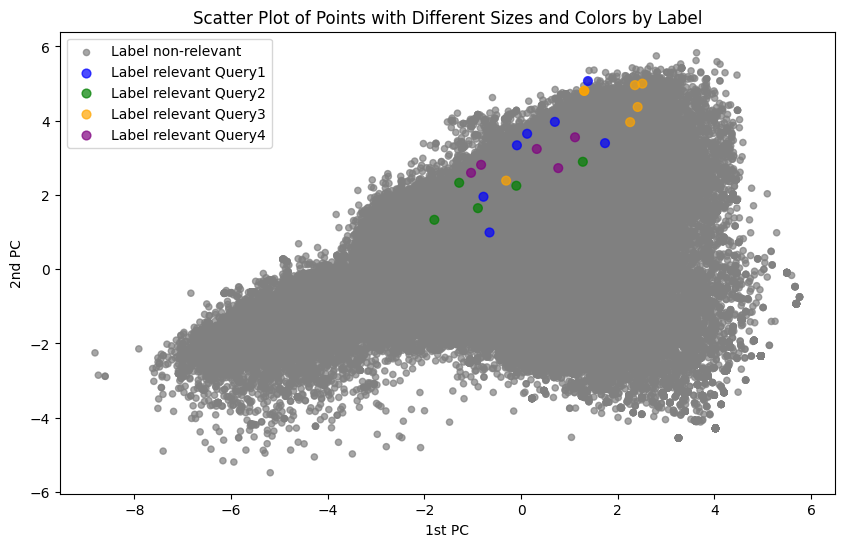

In [ ]:
colors = ['gray', 'blue', 'green', 'orange', 'purple']  # Color for each label 0-4
sizes = np.where(labels == 0, 20, 40)  # Size: 20 if label is 0, otherwise 40
lablesnames = ['non-relevant', 'relevant Query1', 'relevant Query2', 'relevant Query3', 'relevant Query4']

# Plot
plt.figure(figsize=(10, 6))
for label in range(5):  # Iterate through each label (0 to 4)
    plt.scatter(
        vectors_reduced[labels == label, 0], vectors_reduced[labels == label, 1],
        c=colors[label], s=sizes[labels == label],
        label=f'Label {lablesnames[label]}', alpha=0.7
    )

plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.title('Scatter Plot of Points with Different Sizes and Colors by Label')
plt.legend()
plt.show()

In [ ]:
vectors_reduced3dim = reduce_tweet_vectors(vectors, dims=3,use_tsne=False)


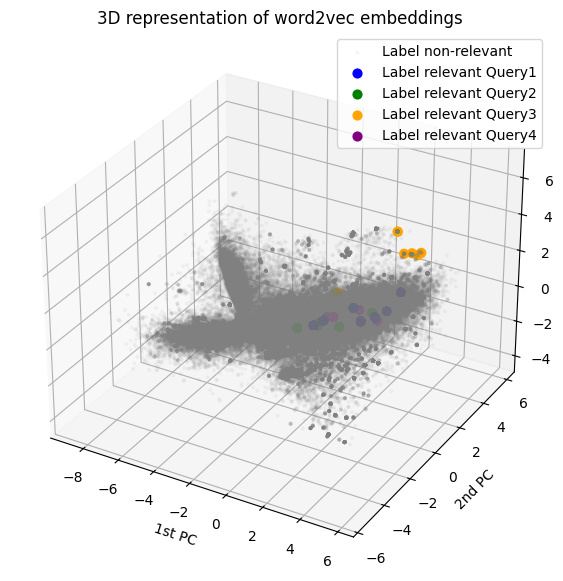

In [ ]:
# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sizes = np.where(labels == 0, 4, 40)  # Size: 20 if label is 0, otherwise 40

# Plot each label in a different color and size
for label in range(5):  # Iterate through each label (0 to 4)
    alpha = 0.05 if label == 0 else 1 # Set alpha to 0.3 for label 0 (translucent), otherwise 0.7

    ax.scatter(
        vectors_reduced3dim[labels == label, 0], vectors_reduced3dim[labels == label, 1], vectors_reduced3dim[labels == label, 2],
        c=colors[label], s=sizes[labels == label],
        label=f'Label {lablesnames[label]}', alpha=alpha
    )

# Label axes and add title and legend
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')
plt.title('3D representation of word2vec embeddings')
plt.legend()
plt.show()